# COVID-19-GLOBAL-DATA-ANALYSIS


Part 1 – Basic Data Understanding (Pandas)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
##Part 1 – Basic Data Understanding (Pandas)
#Load the dataset and display the first 10 rows.
df = pd.read_csv('worldometer_data.csv')
daywise=pd.read_csv('day_wise.csv')
full=pd.read_csv('full_grouped.csv')
df.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [54]:
#Show the shape, column names, and data types.
print("Shape of DataFrame:", df.shape)
print("Column Names:", df.columns.tolist())
print("Data Types:\n", df.dtypes)

Shape of DataFrame: (209, 16)
Column Names: ['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']
Data Types:
 Country/Region       object
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object


In [55]:
#Check for missing values and duplicates.
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

Missing Values:
 Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64
Duplicate Rows: 0


In [56]:
#Use .describe() for numeric columns.
df.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [57]:
#Count the number of unique countries.
print("Unique Countries:", df['Country/Region'].nunique())

Unique Countries: 209


In [58]:
#Find the latest date in the dataset.
latest_date = full['Date'].max()
print("Latest Date in Dataset:", latest_date)

Latest Date in Dataset: 2020-07-27


Part 2 – EDA (Exploratory Data Analysis)

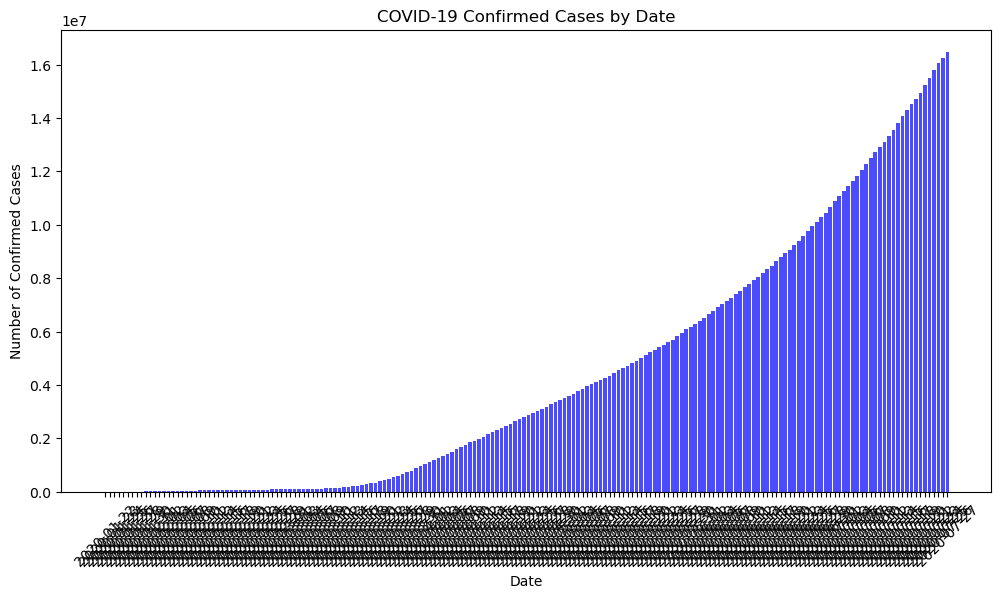

In [59]:
#Histogram of confirmed cases.
plt.figure(figsize=(12,6))
plt.bar(daywise['Date'], daywise['Confirmed'], color='blue', alpha=0.7)
plt.title('COVID-19 Confirmed Cases by Date')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


   Country/Region  Confirmed        Date
0              US    4290259  2020-07-27
1          Brazil    2442375  2020-07-27
2           India    1480073  2020-07-27
3          Russia     816680  2020-07-27
4    South Africa     452529  2020-07-27
5          Mexico     395489  2020-07-27
6            Peru     389717  2020-07-27
7           Chile     347923  2020-07-27
8  United Kingdom     301708  2020-07-27
9            Iran     293606  2020-07-27


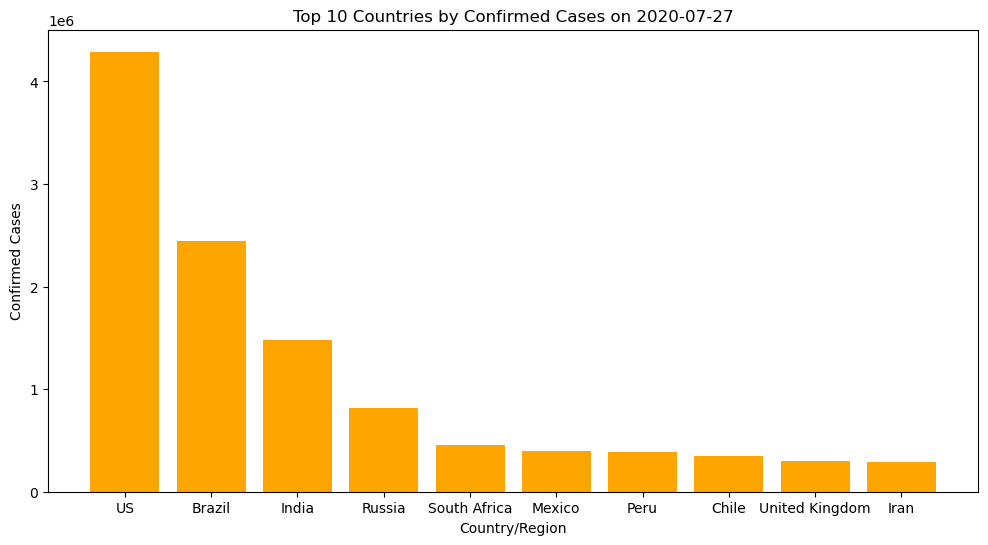

In [60]:
#Top 10 countries by confirmed cases (latest date)
latest_date = full['Date'].max()
top_10_countries = full[full['Date'] == latest_date].nlargest(10, 'Confirmed')
top_10_countries = top_10_countries[['Country/Region', 'Confirmed','Date']].reset_index(drop=True)
print(top_10_countries)
plt.figure(figsize=(12,6))
plt.bar(top_10_countries['Country/Region'], top_10_countries['Confirmed'], color='orange')
plt.title('Top 10 Countries by Confirmed Cases on ' + str(latest_date))
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.show()

   Country/Region  Deaths        Date
0              US  148011  2020-07-27
1          Brazil   87618  2020-07-27
2  United Kingdom   45844  2020-07-27
3          Mexico   44022  2020-07-27
4           Italy   35112  2020-07-27
5           India   33408  2020-07-27
6          France   30212  2020-07-27
7           Spain   28432  2020-07-27
8            Peru   18418  2020-07-27
9            Iran   15912  2020-07-27


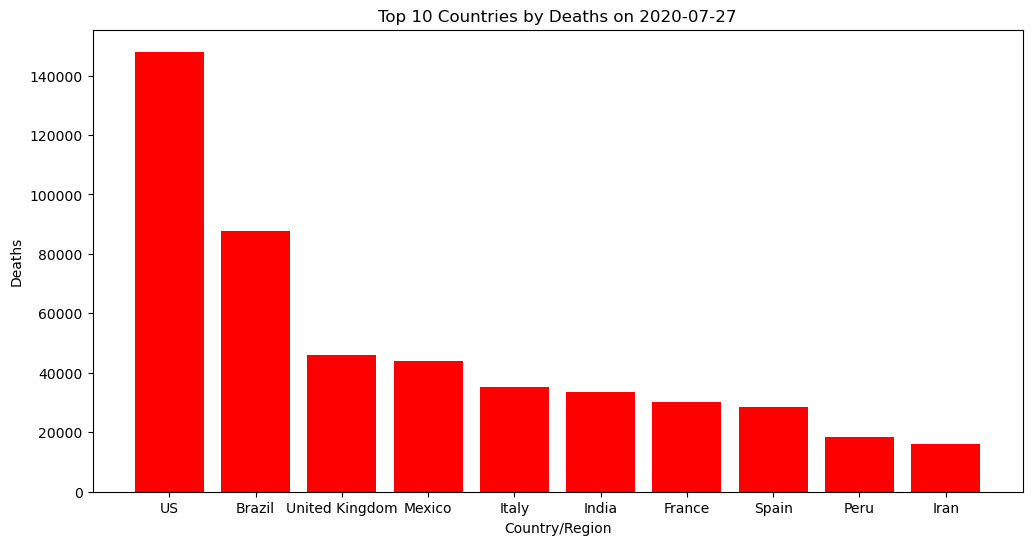

In [61]:
#Top 10 countries by death count (latest date).
latest_date = full['Date'].max()
top_10_deaths = full[full['Date'] == latest_date].nlargest(10, 'Deaths')
top_10_deaths = top_10_deaths[['Country/Region', 'Deaths','Date']].reset_index(drop=True)
print(top_10_deaths)
plt.figure(figsize=(12,6))
plt.bar(top_10_deaths['Country/Region'], top_10_deaths['Deaths'], color='red')
plt.title('Top 10 Countries by Deaths on ' + str(latest_date))
plt.xlabel('Country/Region')
plt.ylabel('Deaths')
plt.show()

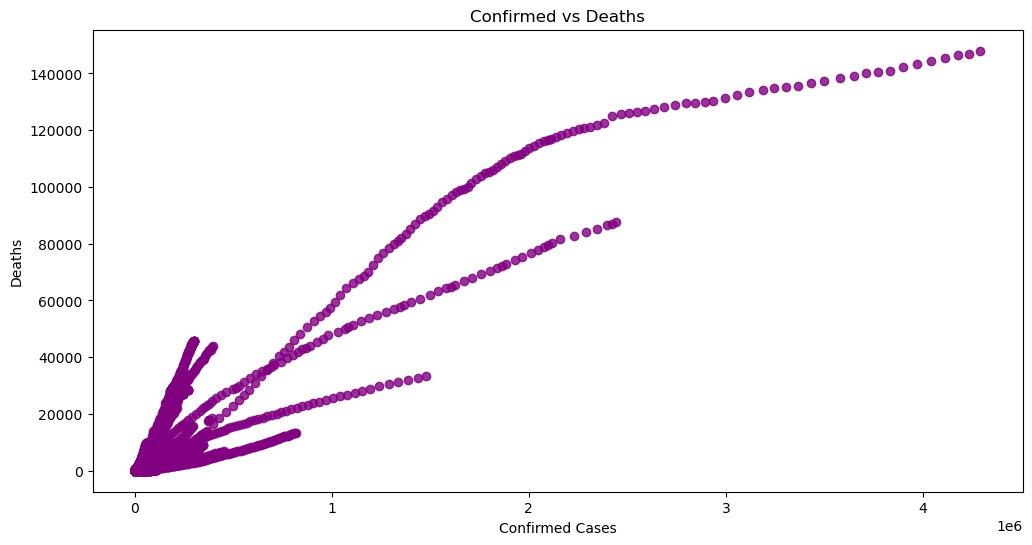

In [62]:
#Scatter plot: confirmed vs deaths
plt.figure(figsize=(12,6))
plt.scatter(full['Confirmed'], full['Deaths'], alpha=0.8, color='purple')
plt.title('Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()


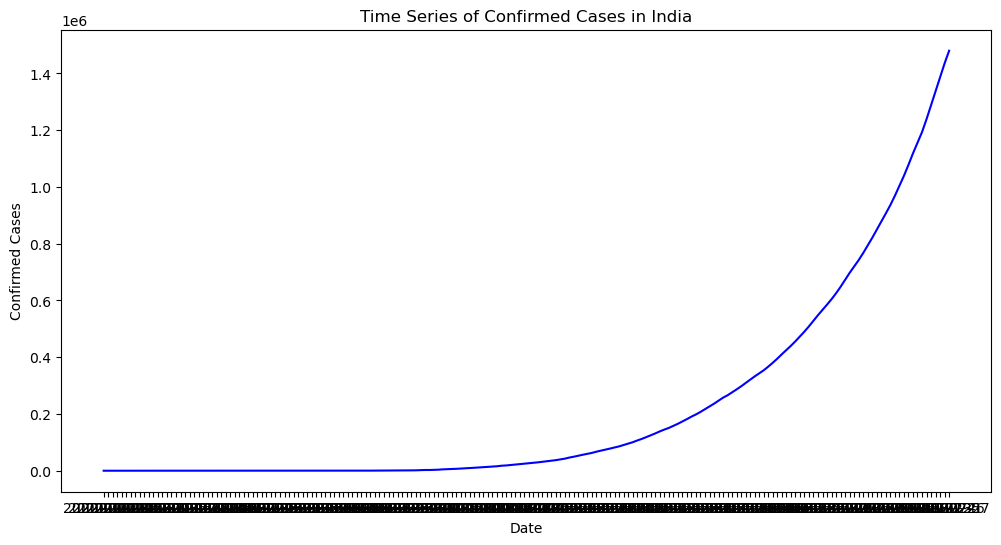

In [63]:
#Time series line plot for confirmed cases in "India".
india_data = full[full['Country/Region'] == 'India']
plt.figure(figsize=(12,6))
plt.plot(india_data['Date'], india_data['Confirmed'], color='blue')
plt.title('Time Series of Confirmed Cases in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()


In [64]:
print(df['Continent'].unique())

['North America' 'South America' 'Asia' 'Europe' 'Africa'
 'Australia/Oceania' nan]


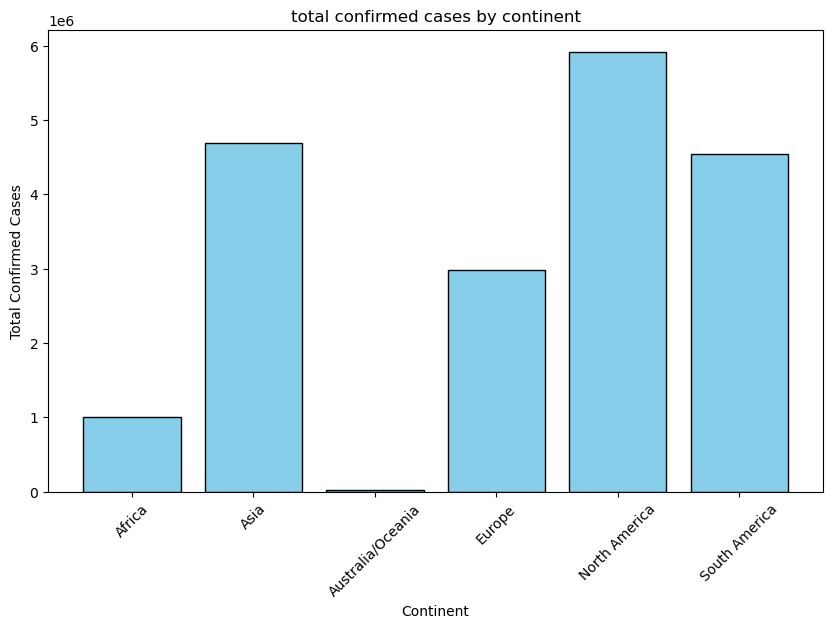

In [65]:
#Bar chart of total confirmed cases by continent (group manually) in df
continent_cases = df.groupby('Continent', as_index=False)['TotalCases'].sum()

plt.figure(figsize=(10,6))
plt.bar(continent_cases['Continent'], continent_cases['TotalCases'],
        color='skyblue', edgecolor='black')
plt.title("total confirmed cases by continent")
plt.xlabel("Continent")
plt.ylabel("Total Confirmed Cases")
plt.xticks(rotation=45)

plt.show()


Part 3 – Statistics

In [66]:
#Calculate mean, median, and mode of confirmed cases (latest date).
mean_cases = df['TotalCases'].mean()
median_cases = df['TotalCases'].median()
mode_cases = df['TotalCases'].mode()[0]
print("Mean of Confirmed Cases:", mean_cases)
print("Median of Confirmed Cases:", median_cases)
print("Mode of Confirmed Cases:", mode_cases)

Mean of Confirmed Cases: 91718.4976076555
Median of Confirmed Cases: 4491.0
Mode of Confirmed Cases: 13


In [67]:
#Find variance and standard deviation of death counts.
variance_deaths = df['TotalDeaths'].var()
std_deaths = df['TotalDeaths'].std()
print("Variance of Death Counts:", variance_deaths)
print("Standard Deviation of Death Counts:", std_deaths)

Variance of Death Counts: 239852895.4195872
Standard Deviation of Death Counts: 15487.184877168194


In [68]:
#Correlation between confirmed and death counts.
correlation = df['TotalCases'].corr(df['TotalDeaths'])
print("Correlation between Confirmed and Death Counts:", correlation)

Correlation between Confirmed and Death Counts: 0.9386219031238753


In [69]:
#Probability: Random country has more than 100,000 confirmed cases.
probability = (df['TotalCases'] > 100000).mean().round(2)
print("Probability of Random Country having more than 100,000 Confirmed Cases:", probability)


Probability of Random Country having more than 100,000 Confirmed Cases: 0.12


In [70]:
#Probability: Death rate > 5%.
death_rate = df['TotalDeaths'] / df['TotalCases']
probability_death_rate = (death_rate > 0.05).mean().round(2)
print("Probability of Random Country having Death Rate > 5%:", probability_death_rate)


Probability of Random Country having Death Rate > 5%: 0.16


Part 4 – Linear Algebra & NumPy

In [71]:
#Create NumPy arrays for confirmed and deaths.and remove null values or fill
confirmed_cases = df['TotalCases'].fillna(0).values
death_counts = df['TotalDeaths'].fillna(0).values

In [72]:
#Perform vector subtraction (confirmed - deaths).
active_cases = confirmed_cases - death_counts
print(active_cases)

[4.869375e+06 2.818918e+06 1.983771e+06 8.572880e+05 5.285800e+05
 4.121730e+05 4.349850e+05 3.567820e+05 3.457710e+05 3.260300e+05
 3.021410e+05 2.617210e+05 2.811710e+05 2.758280e+05 2.463450e+05
 2.140170e+05 2.314670e+05 2.239440e+05 2.059580e+05 1.653210e+05
 1.354420e+05 1.173100e+05 1.132320e+05 1.095950e+05 1.119140e+05
 9.488400e+04 9.005500e+04 8.466000e+04 8.295800e+04 7.620100e+04
 8.022100e+04 7.898300e+04 7.498900e+04 7.529000e+04 6.984400e+04
 6.129900e+04 6.957600e+04 6.792300e+04 6.149100e+04 5.532900e+04
 5.082900e+04 5.452800e+04 5.222000e+04 5.031800e+04 4.774100e+04
 4.431400e+04 4.367500e+04 4.273300e+04 4.123700e+04 3.904700e+04
 3.944300e+04 3.721200e+04 3.559800e+04 3.412300e+04 3.235300e+04
 3.276800e+04 2.919500e+04 2.814000e+04 2.671100e+04 2.580000e+04
 2.460400e+04 2.401200e+04 2.210400e+04 2.168500e+04 2.097700e+04
 2.087000e+04 2.053500e+04 1.963500e+04 1.861300e+04 1.734100e+04
 1.732700e+04 1.634400e+04 1.421600e+04 1.368900e+04 1.330600e+04
 1.301200e

In [73]:
#Compute the dot product of confirmed and deaths arrays
dot_product = np.dot(confirmed_cases, death_counts)
print("Dot Product:", dot_product)

Dot Product: 1309758668623.0


In [74]:
#Create a matrix [Confirmed, Deaths] and multiply with weights [0.7, 0.3]
weighted_matrix = np.array([confirmed_cases, death_counts]).T
weights = np.array([0.7, 0.3])
weighted_sum = np.dot(weighted_matrix, weights)
print("Weighted Sum of Confirmed and Deaths:", weighted_sum)


Weighted Sum of Confirmed and Deaths: [3.5713665e+06 2.0718866e+06 1.4302777e+06 6.1470760e+05 3.7961000e+05
 3.3903810e+05 3.2491350e+05 2.5963640e+05 2.5397870e+05 2.5672100e+05
 2.2947470e+05 2.2961770e+05 1.9987470e+05 1.9911460e+05 1.7574750e+05
 1.8499890e+05 1.6782490e+05 1.6101180e+05 1.5342260e+05 1.4603670e+05
 9.9970400e+04 8.4267000e+04 8.4783400e+04 8.5682500e+04 7.8517800e+04
 6.7476800e+04 6.7989500e+04 6.5139000e+04 6.1535600e+04 5.9106700e+04
 5.6646700e+04 5.5864100e+04 5.4311300e+04 5.3949000e+04 5.0464800e+04
 5.2768300e+04 4.9172200e+04 4.8126100e+04 4.3397700e+04 4.1296300e+04
 4.1733300e+04 3.8196600e+04 3.8673000e+04 3.6965600e+04 3.5192700e+04
 3.1949800e+04 3.1995500e+04 3.0069100e+04 2.9891900e+04 2.8104900e+04
 2.7809100e+04 2.7495400e+04 2.6216600e+04 2.5871100e+04 2.3920100e+04
 2.3416600e+04 2.0885500e+04 1.9873000e+04 1.9318700e+04 1.8888000e+04
 1.8990800e+04 1.7207400e+04 1.5667800e+04 1.5244500e+04 1.5402900e+04
 1.4809000e+04 1.4739500e+04 1.3999500e

In [75]:
#Normalize the confirmed array.
normalized_confirmed = (confirmed_cases - np.min(confirmed_cases)) / (np.max(confirmed_cases) - np.min(confirmed_cases))
print("Normalized Confirmed Cases:", normalized_confirmed)

Normalized Confirmed Cases: [1.00000000e+00 5.79780210e-01 4.02490258e-01 1.73262067e-01
 1.06946726e-01 9.19444478e-02 9.04975568e-02 7.28634114e-02
 7.10826683e-02 7.04507341e-02 6.36121323e-02 6.12308529e-02
 5.64798201e-02 5.60102413e-02 4.96090255e-02 4.95201970e-02
 4.71476614e-02 4.53452577e-02 4.27648594e-02 3.88744893e-02
 2.79388470e-02 2.37372791e-02 2.35967830e-02 2.35586285e-02
 2.22730993e-02 1.90637477e-02 1.88777444e-02 1.79896581e-02
 1.71721180e-02 1.62866152e-02 1.60374185e-02 1.58080939e-02
 1.52614111e-02 1.52073589e-02 1.41903024e-02 1.41386349e-02
 1.39174579e-02 1.36110294e-02 1.22879418e-02 1.15029920e-02
 1.13215594e-02 1.08392624e-02 1.07963385e-02 1.03436510e-02
 9.83770617e-03 8.98896679e-03 8.95995345e-03 8.52097773e-03
 8.39657810e-03 7.91090283e-03 7.87572913e-03 7.68038593e-03
 7.33003999e-03 7.17344747e-03 6.68022080e-03 6.60490536e-03
 5.88891192e-03 5.62481109e-03 5.42946789e-03 5.28956798e-03
 5.23869528e-03 4.84900249e-03 4.42930275e-03 4.32020467e

Part 5 – Calculus

In [76]:
#Assume: Severity_Index = (Deaths×100) / Confirmed ,Find derivative wrt Deaths.
import sympy as sp
death_counts, confirmed_cases = sp.symbols('Deaths Confirmed')
Severity_Index = (death_counts * 100) / confirmed_cases
derivative = sp.diff(Severity_Index, death_counts)
print("Derivative:", derivative)

Derivative: 100/Confirmed


Part 6 – Feature Engineering


In [83]:
full

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [103]:
#Create column death_rate = (Deaths / Confirmed) × 100.

full = full.fillna(0)
full['death_rate'] = (full['Deaths'] / full['Confirmed']) * 100
full['death_rate'] = full['death_rate'].fillna(0).round(2)
print(full[['Country/Region', 'Date', 'Deaths', 'Confirmed', 'death_rate']].tail())

           Country/Region        Date  Deaths  Confirmed  death_rate
35151  West Bank and Gaza  2020-07-27      78      10621        0.73
35152      Western Sahara  2020-07-27       1         10       10.00
35153               Yemen  2020-07-27     483       1691       28.56
35154              Zambia  2020-07-27     140       4552        3.08
35155            Zimbabwe  2020-07-27      36       2704        1.33


In [102]:
full['death_rate']

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
         ...  
35151     0.73
35152    10.00
35153    28.56
35154     3.08
35155     1.33
Name: death_rate, Length: 35156, dtype: float64

In [104]:
#Create recovery_rate = (Recovered / Confirmed) × 100
full['recovery_rate'] = (full['Recovered'] / full['Confirmed']) * 100
full['recovery_rate'] = full['recovery_rate'].fillna(0).round(2)
print(full[['Country/Region', 'Date', 'Recovered', 'Confirmed', 'recovery_rate']].tail())

           Country/Region        Date  Recovered  Confirmed  recovery_rate
35151  West Bank and Gaza  2020-07-27       3752      10621          35.33
35152      Western Sahara  2020-07-27          8         10          80.00
35153               Yemen  2020-07-27        833       1691          49.26
35154              Zambia  2020-07-27       2815       4552          61.84
35155            Zimbabwe  2020-07-27        542       2704          20.04


In [105]:
#Create high_risk = 1 if death_rate > 5 else 0.
full['high_risk'] = (full['death_rate'] > 5).astype(int)
print(full[['Country/Region', 'Date', 'death_rate', 'high_risk']].tail())

           Country/Region        Date  death_rate  high_risk
35151  West Bank and Gaza  2020-07-27        0.73          0
35152      Western Sahara  2020-07-27       10.00          1
35153               Yemen  2020-07-27       28.56          1
35154              Zambia  2020-07-27        3.08          0
35155            Zimbabwe  2020-07-27        1.33          0


In [106]:
#Create quartiles based on confirmed cases.
quartiles = pd.qcut(full['Confirmed'], 4, labels=False)
full['quartile'] = quartiles
print(full[['Country/Region', 'Date', 'Confirmed', 'quartile']].tail())

           Country/Region        Date  Confirmed  quartile
35151  West Bank and Gaza  2020-07-27      10621         3
35152      Western Sahara  2020-07-27         10         1
35153               Yemen  2020-07-27       1691         2
35154              Zambia  2020-07-27       4552         3
35155            Zimbabwe  2020-07-27       2704         2


In [107]:
#Create active_cases = Confirmed - (Deaths + Recovered).
full['active_cases'] = full['Confirmed'] - (full['Deaths'] + full['Recovered'])
print(full[['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'active_cases']].tail())


           Country/Region        Date  Confirmed  Deaths  Recovered  \
35151  West Bank and Gaza  2020-07-27      10621      78       3752   
35152      Western Sahara  2020-07-27         10       1          8   
35153               Yemen  2020-07-27       1691     483        833   
35154              Zambia  2020-07-27       4552     140       2815   
35155            Zimbabwe  2020-07-27       2704      36        542   

       active_cases  
35151          6791  
35152             1  
35153           375  
35154          1597  
35155          2126  


In [113]:
#Create above_average_confirmed flag
average_confirmed = full['Confirmed'].mean()
full['above_average_confirmed'] = (full['Confirmed'] > average_confirmed).astype(int)
print(full[['Country/Region', 'Date', 'Confirmed', 'above_average_confirmed']].tail(20))

             Country/Region        Date  Confirmed  above_average_confirmed
35136              Thailand  2020-07-27       3297                        0
35137           Timor-Leste  2020-07-27         24                        0
35138                  Togo  2020-07-27        874                        0
35139   Trinidad and Tobago  2020-07-27        148                        0
35140               Tunisia  2020-07-27       1455                        0
35141                Turkey  2020-07-27     227019                        1
35142                    US  2020-07-27    4290259                        1
35143                Uganda  2020-07-27       1128                        0
35144               Ukraine  2020-07-27      67096                        1
35145  United Arab Emirates  2020-07-27      59177                        1
35146        United Kingdom  2020-07-27     301708                        1
35147               Uruguay  2020-07-27       1202                        0
35148       

Part 7 – SQL Simulation in Pandas

In [114]:
#Select all countries with death_rate > 5.
high_risk_countries = full[full['death_rate'] > 5]
print(high_risk_countries[['Country/Region', 'Date', 'death_rate']].tail())

            Country/Region        Date  death_rate
35132                Syria  2020-07-27        5.93
35139  Trinidad and Tobago  2020-07-27        5.41
35146       United Kingdom  2020-07-27       15.19
35152       Western Sahara  2020-07-27       10.00
35153                Yemen  2020-07-27       28.56


In [116]:
#Sort by confirmed cases descending.
high_risk_countries_sorted = high_risk_countries.sort_values(by='Confirmed', ascending=False)
print(high_risk_countries_sorted[['Country/Region', 'Date', 'Confirmed', 'death_rate']].head(20))

      Country/Region        Date  Confirmed  death_rate
29532             US  2020-06-27    2510259        5.02
29345             US  2020-06-26    2467554        5.09
29158             US  2020-06-25    2422299        5.16
28971             US  2020-06-24    2382426        5.15
28784             US  2020-06-23    2347491        5.19
28597             US  2020-06-22    2312303        5.23
28410             US  2020-06-21    2281767        5.29
28223             US  2020-06-20    2255328        5.34
28036             US  2020-06-19    2222579        5.39
27849             US  2020-06-18    2191099        5.43
27662             US  2020-06-17    2163290        5.47
27475             US  2020-06-16    2137731        5.50
27288             US  2020-06-15    2114026        5.52
27101             US  2020-06-14    2094366        5.56
26914             US  2020-06-13    2074542        5.60
26727             US  2020-06-12    2048986        5.63
26540             US  2020-06-11    2023656     

In [123]:
#Group by continent and calculate average death_rate.
full['Continent'] = full['Country/Region'].apply(lambda x: 'Asia' if x in ['India', 'China', 'Japan'] else 'Europe' if x in ['Germany', 'France', 'Italy'] else 'North America' if x in ['USA', 'Canada'] else 'Other')
continent_death_rate = full.groupby('Continent')['death_rate'].mean().reset_index()
print(continent_death_rate)


       Continent  death_rate
0           Asia    3.295426
1         Europe    7.621667
2  North America    4.360585
3          Other    2.352690


In [127]:
#Sort by confirmed cases descending.
full_sorted = full.sort_values(by='Confirmed', ascending=False)
full_sorted[['Country/Region', 'Date', 'Confirmed']].head(10)

,Country/Region,Date,Confirmed
35142,US,2020-07-27,4290259
34955,US,2020-07-26,4233923
34768,US,2020-07-25,4178970
34581,US,2020-07-24,4112531
34394,US,2020-07-23,4038816
34207,US,2020-07-22,3970121
34020,US,2020-07-21,3899211
33833,US,2020-07-20,3834677
33646,US,2020-07-19,3773260
33459,US,2020-07-18,3711413


In [129]:
#Group by continent and calculate average death_rate.
continent_death_rate = full.groupby('Continent')['death_rate'].mean().reset_index()
print(continent_death_rate)


       Continent  death_rate
0           Asia    3.295426
1         Europe    7.621667
2  North America    4.360585
3          Other    2.352690


In [128]:
#Get top 5 countries by recovery rate
top_recovery_countries = full[full['recovery_rate'] > 0].nlargest(5, 'recovery_rate')
print(top_recovery_countries[['Country/Region', 'Date', 'recovery_rate']])

      Country/Region        Date  recovery_rate
33834         Uganda  2020-07-20         100.19
3337       Sri Lanka  2020-02-08         100.00
3524       Sri Lanka  2020-02-09         100.00
3711       Sri Lanka  2020-02-10         100.00
3898       Sri Lanka  2020-02-11         100.00


In [131]:
#Select countries where confirmed > 1M and death_rate < 2%.
selected_countries = full[(full['Confirmed'] > 1000000) & (full['death_rate'] < 2)]
print(selected_countries[['Country/Region', 'Date', 'Confirmed', 'death_rate']])

Empty DataFrame
Columns: [Country/Region, Date, Confirmed, death_rate]
Index: []
